<a href="https://colab.research.google.com/github/ribka-5/Statistika-Sains-Data/blob/main/LinierDiscriminant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LINEAR DISCRIMINANT**

Linear Discriminant Analysis (LDA) merupakan salah satu metode yang digunakan untuk mengelompokkan data ke dalam beberapa kelas. Penentuan pengelompokan didasarkan pada garis batas (garis lurus) yang diperoleh dari persamaan linear.

In [ ]:
# Mengimpor library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
uploded = files.upload()

Saving 10. data bad good.xlsx to 10. data bad good.xlsx


In [ ]:
# Mengimpor datasetnya
df = pd.read_excel('10. data bad good.xlsx', sheet_name='Sheet1')
df

,tanggungan,pendapatan,Usia,Status
0,6,10.0,39,Bad
1,1,9.0,49,Bad
2,2,4.8,35,Bad
3,0,4.9,52,Bad
4,1,4.7,34,Bad
...,...,...,...,...
95,1,14.2,54,Good
96,1,10.7,59,Good
97,3,10.0,58,Good
98,0,12.0,39,Good


In [ ]:
# melakukan slicing untuk X (variabel independen) dan y (variabel dependen)
X = df.iloc[:, 0:3].values
y = df.iloc[:, 3].values

In [ ]:
# Membagi data ke dalam  Training set dan Test set
# membagi dataset ke training dan test set dengan komposisi 70:30.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [ ]:
# Proses Feature Scaling
# melakukan proses feature scaling untuk X_train dan X_test. Artinya kita menyamakan satuan (skala) untuk semua kolom di variabel X_train dan X_test.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Menjalankan algoritma LDA
# variabel (objek) dengan nama lda untuk menjalankan algoritma LDA itu sendiri. Parameter yang diperlukan adalah n_components = 2,
# artinya kita ingin membuat 2 linear discriminants (2 LDs) saja.
# Dengan demikian, kita akan memiliki 2 variabel independen baru (LD1 dan LD2) yang merupakan ringkasan dari beberapa kolom variabel independen X.
# Mengapa kita memilih sebanyak 2 komponen? Karena kita memerlukan 2 sumbu untuk visualisasi 2 dimensi (2D) nantinya.

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

ValueError: ignored

In [ ]:
# Menjalankan algoritma logistic regression ke training set
from sklearn.linear_model import LogisticRegression
mesin_klasifikasi = LogisticRegression(random_state = 0)
mesin_klasifikasi.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Memprediksi test set berdasakan model logistic regression
y_pred = mesin_klasifikasi.predict(X_test)

# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

ValueError: ignored

In [ ]:
# Visualisasi Hasil Training Set
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, mesin_klasifikasi.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('Pendapatan')
plt.ylabel('Usia')
plt.legend()
plt.show()


ValueError: ignored

Terlihat secara visual ada banyak titik yang salah masuk klasifikasi (titik hijau masuk ke zona merah lalu titik biru masuk ke zona merah dan hijau)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

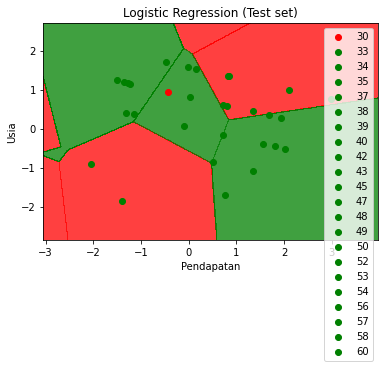

In [ ]:
# Visualisasi Test Set
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, mesin_klasifikasi.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Pendapatan')
plt.ylabel('Usia')
plt.legend()
plt.show()

Terlihat secara visual ada 2 banyak titik yang salah masuk klasifikasi (titik hijau masuk ke zona merah ) lalu 5 titik biru masuk ke zona merah.
LDA (linear discriminant analysis) memberikan hasil klasifikasi yang lebih baik (akurasi lebih tinggi) jika dikombinasikan dengan teknik klasifikasi klasik machine learning, baik itu logistic regression, support vector regression, dan lain-lain.

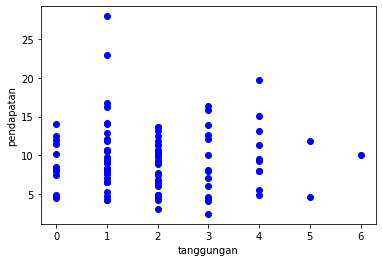

In [ ]:
plt.scatter(df.Tanggungan, df.Pendapatan,  color='blue')
plt.xlabel("tanggungan")
plt.ylabel("pendapatan")
plt.show()

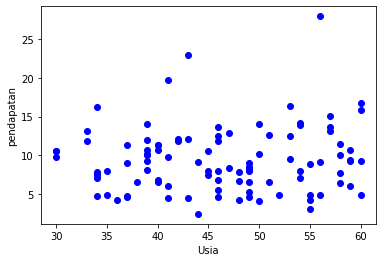

In [ ]:
plt.scatter(df.Usia, df.Pendapatan,  color='blue')
plt.xlabel("Usia")
plt.ylabel("pendapatan")
plt.show()